# Customer Churn

---

## Contents

- <a href="#import">Import Libraries</a><br>
- <a href="#data">Import Data</a><br>
- <a href="#3">Creating 3-way Holdout data sets</a><br>
- <a href="#eda">Exploratory Data Analysis</a><br>
- <a href="#prep">Data Preprocessing</a><br>
- <a href="#sel">Feature Selection</a><br>
- <a href="#engg">Feature Engineering</a><br>

---

<p><a name="import"></a></p>
 
### Import Modules

In [1]:
# Standard Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Compose
from sklearn.compose import make_column_transformer

# Classes for inheritance
from sklearn.base import BaseEstimator, TransformerMixin

# Pipeline
from sklearn.pipeline import make_pipeline

---

<p><a name="data"></a></p>

### Import Data

In [2]:
# Read csv

churn_data = pd.read_csv('./data/churn_data.csv')

In [3]:
churn_data.shape

(3333, 21)

---

<p><a name="3"></a></p>

### Creating a 3-way holdout dataset
- Training & Validation data 
- Test (Unseen) data

In [4]:
X_tmp = churn_data.drop(['Churn'], axis=1)
y_tmp = churn_data['Churn']

print('Shape of X and y:\n')
print(X_tmp.shape, y_tmp.shape)

Shape of X and y:

(3333, 20) (3333,)


In [5]:
# Split data into training - validation and test (unseen) data

X_train_val, X_unseen, y_train_val, y_unseen = train_test_split(X_tmp, y_tmp, test_size=0.2)

In [6]:
print('Shape of training & validation data:')
print(X_train_val.shape, y_train_val.shape)
print('\n','-'*40)
print('\nShape of test(unseen) data:')
print(X_unseen.shape, y_unseen.shape)

Shape of training & validation data:
(2666, 20) (2666,)

 ----------------------------------------

Shape of test(unseen) data:
(667, 20) (667,)


In [7]:
# Making a working copy of the training and validation data

df = X_train_val.copy()

In [8]:
# Adding churned feature back into dataset to understand properties
# of churned v/s non-churned customers

df['Churn'] = y_train_val

**df = X_train_val + y_train_val**

In [9]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,Churn
2076,95,0,228.9,255.7,208.0,10.1,4,yes,no,134,...,71,21.73,120,9.36,2,2.73,NH,408,400-8538,yes
1712,102,0,174.5,213.7,164.7,10.3,4,no,no,73,...,114,18.16,116,7.41,5,2.78,SC,408,368-3078,no
559,125,0,131.8,136.7,308.2,7.7,2,no,no,97,...,100,11.62,119,13.87,6,2.08,CO,415,378-9029,no
1461,145,0,39.5,264.3,185.8,10.0,0,no,no,78,...,106,22.47,90,8.36,6,2.70,SC,408,377-6635,no
702,99,0,191.2,163.9,243.6,14.1,1,no,no,110,...,102,13.93,114,10.96,3,3.81,KS,415,407-1896,no


---

<p><a name="eda"></a></p>

### Exploratory Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 2076 to 2828
Data columns (total 21 columns):
Account_Length    2666 non-null int64
Vmail_Message     2666 non-null int64
Day_Mins          2666 non-null float64
Eve_Mins          2666 non-null float64
Night_Mins        2666 non-null float64
Intl_Mins         2666 non-null float64
CustServ_Calls    2666 non-null int64
Intl_Plan         2666 non-null object
Vmail_Plan        2666 non-null object
Day_Calls         2666 non-null int64
Day_Charge        2666 non-null float64
Eve_Calls         2666 non-null int64
Eve_Charge        2666 non-null float64
Night_Calls       2666 non-null int64
Night_Charge      2666 non-null float64
Intl_Calls        2666 non-null int64
Intl_Charge       2666 non-null float64
State             2666 non-null object
Area_Code         2666 non-null int64
Phone             2666 non-null object
Churn             2666 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 458.2+ KB


In [11]:
sns.set()

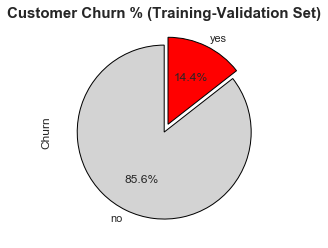

In [12]:
# Customer Churn as a % 

df['Churn'].value_counts().plot(kind='pie'
                                ,colors=['lightgrey','red']
                                ,wedgeprops={'edgecolor': 'black'}
                                ,explode=[0,0.1]
                                ,autopct='%1.1f%%'
                                ,startangle=90)
plt.title('Customer Churn % (Training-Validation Set)', size=15, fontweight='bold')
plt.show()

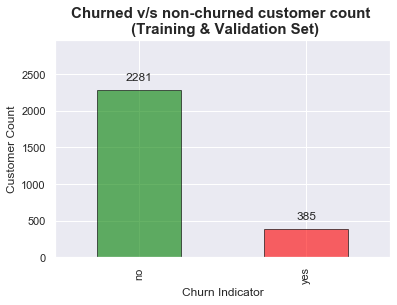

In [13]:
# Number of churned customers

color = ['green', 'red']

df['Churn'].value_counts().plot(kind='bar', alpha=0.6, color=color, edgecolor='black')

plt.title('Churned v/s non-churned customer count \n (Training & Validation Set)', size=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.xlabel('Churn Indicator')

plt.margins(0.3)

for x,y in enumerate(df['Churn'].value_counts()):

    label = "{:.0f}".format(y)

    plt.annotate(label
                 ,(x,y)
                 ,textcoords="offset points"
                 ,xytext=(0,10)
                 ,ha='center'
                ) 
plt.show()

In [14]:
df.groupby('Churn')[['CustServ_Calls', 'Vmail_Message']].mean()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.443227,8.524331
yes,2.236364,4.735065


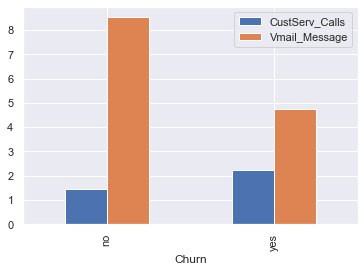

In [15]:
# Analyzing churned v/s non-churned customer differences

df.groupby('Churn')[['CustServ_Calls', 'Vmail_Message']].mean().plot(kind='bar')

In [16]:
df.groupby('Churn')[['CustServ_Calls', 'Vmail_Message']].std()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.157526,13.929536
yes,1.825379,11.490596


In [17]:
# TO DO - make it mardown 




# Insights
    # It can be seen above that Churners place more customer 
    # service calls than non-churners, and leave fewer voice
    # mail messages.

In [18]:
# Veiwing churners and non-churners by state

df.groupby('State')['Churn'].value_counts()[['AL','CA','CO']]

State  Churn
AL     no       61
       yes       6
CA     no       20
       yes       8
CO     no       45
       yes       9
Name: Churn, dtype: int64

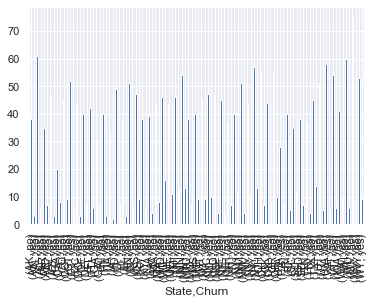

In [19]:
# TO DO - multiple bar to see churn and non-churn across different states





df.groupby('State')['Churn'].value_counts().plot(kind='bar')

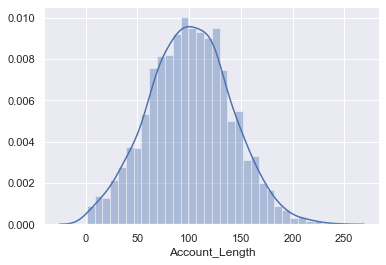

In [20]:
# Distribution of "Account_Length" feature

# plt.hist(df['Account_Length'], bins=25)
sns.distplot(df['Account_Length'])
plt.show()

In [21]:
# Insights
    # Illustrates the duration that a customer stays with the provider
    # is normally distribution (as what to expect in the real world)

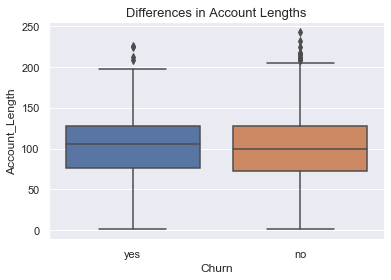

In [22]:
# Examining differences between churners and non-churners
# w.r.t their account lengths

sns.boxplot(x='Churn', 
            y='Account_Length', 
            data=df)

plt.title('Differences in Account Lengths', size=13)
plt.show()

In [23]:
# There are no notable differences in account lengths for
# churners v/s non-churners

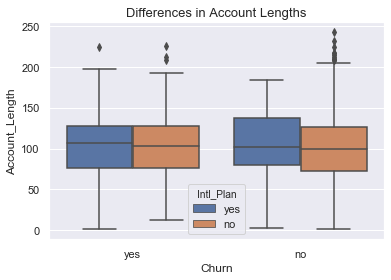

In [24]:
# Checking if having an international plan matters

sns.boxplot(x='Churn', 
            y='Account_Length', 
            data=df,
            hue='Intl_Plan')

plt.title('Differences in Account Lengths', size=13)
plt.show()

In [25]:
# Insights
    # No noticeable difference amoung customers with or
    # without an international plan

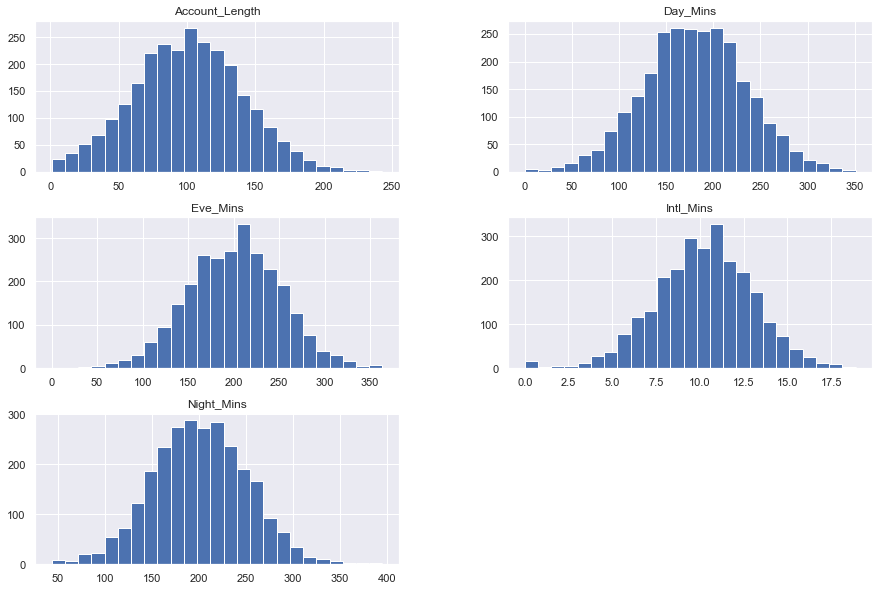

In [26]:
# Checking distribution of select features

df[['Account_Length', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins']].hist(bins=25, figsize=(15,10))
plt.show()

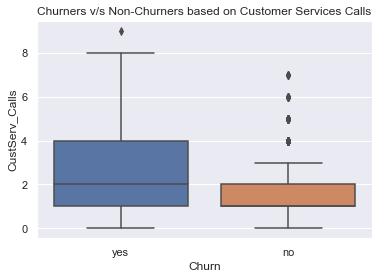

In [27]:
# Churn difference based on Customer Service Calls placed

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df)

plt.title('Churners v/s Non-Churners based on Customer Services Calls')
plt.show()

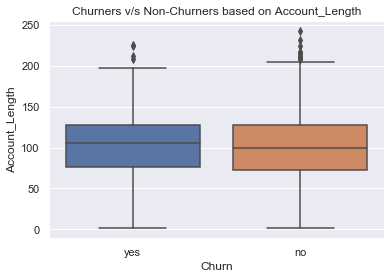

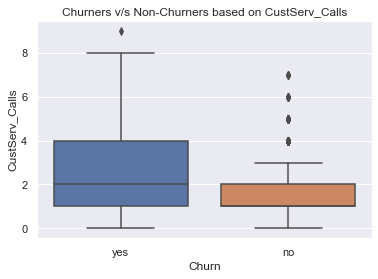

In [28]:
features = ['Account_Length', 'CustServ_Calls'] 

for feature in features:
    fig, axs = plt.subplots()
    fig = sns.boxplot(x = 'Churn',
                      y = feature,
                      data = df)
    plt.title('Churners v/s Non-Churners based on {}'.format(feature))

plt.show()

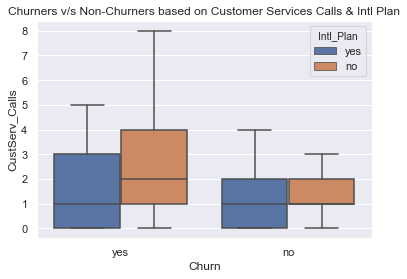

In [29]:
# Churn difference based on Customer Service Calls placed
# and being on an International Plan

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df,
            sym='', # removing outliers from plot
            hue='Intl_Plan') 

plt.title('Churners v/s Non-Churners based on Customer Services Calls & Intl Plan')
plt.show()

In [30]:
# Insights:
    # Customers who leave more customer service calls churn more
    # unless they also have an international plan

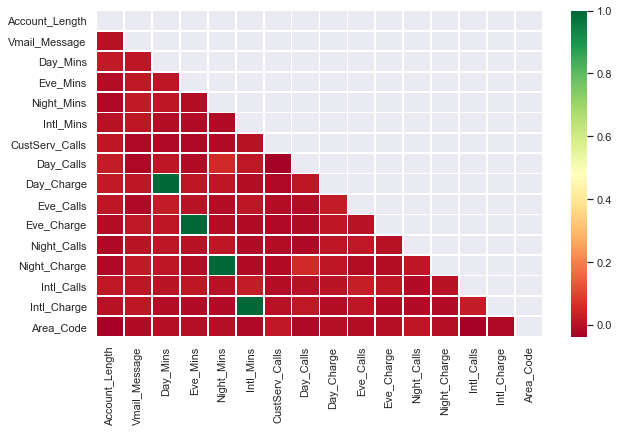

In [31]:
plt.figure(figsize=(10,6))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df.corr(), mask= mask, linewidth=0.7, cmap='RdYlGn') 
plt.show()

In [32]:
# Since charges and mins are strongly correlated, we can either remove
# one of them, or feature engineer them to create 4 new charges_min
# and drop the charges and min columns subsequently.

---

<p><a name="prep"></a></p>

## Data Preprocessing

- Check missing values
- Checking distribution of features
- Encoding Categorical variables
- Feature Scaling via Standardization
- Feature Selection and Engineering

### Missing Values

In [33]:
# Missing values check

missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

In [34]:
# Examining data types 

df.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
Churn              object
dtype: object

In [35]:
# Forming list of columns that are numerical and categorical

features_num = X_train_val.select_dtypes(include=['int64', 'float64']).columns
features_cat = X_train_val.select_dtypes(include=['object']).columns

In [36]:
print(features_num)
print('-'*80)
print(features_cat)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Day_Charge', 'Eve_Calls',
       'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls',
       'Intl_Charge', 'Area_Code'],
      dtype='object')
--------------------------------------------------------------------------------
Index(['Intl_Plan', 'Vmail_Plan', 'State', 'Phone'], dtype='object')


In [37]:
X_train_val[features_num]

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
2076,95,0,228.9,255.7,208.0,10.1,4,134,38.91,71,21.73,120,9.36,2,2.73,408
1712,102,0,174.5,213.7,164.7,10.3,4,73,29.67,114,18.16,116,7.41,5,2.78,408
559,125,0,131.8,136.7,308.2,7.7,2,97,22.41,100,11.62,119,13.87,6,2.08,415
1461,145,0,39.5,264.3,185.8,10.0,0,78,6.72,106,22.47,90,8.36,6,2.70,408
702,99,0,191.2,163.9,243.6,14.1,1,110,32.50,102,13.93,114,10.96,3,3.81,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,163,0,247.7,269.5,167.3,9.6,0,77,42.11,108,22.91,82,7.53,7,2.59,408
753,90,0,109.6,137.6,159.7,11.0,2,88,18.63,108,11.70,121,7.19,5,2.97,415
2402,77,33,143.0,212.2,104.9,15.3,5,101,24.31,102,18.04,120,4.72,4,4.13,415
2573,124,0,312.0,180.0,168.6,12.8,1,112,53.04,109,15.30,94,7.59,4,3.46,415


In [38]:
X_train_val[features_cat]

,Intl_Plan,Vmail_Plan,State,Phone
2076,yes,no,NH,400-8538
1712,no,no,SC,368-3078
559,no,no,CO,378-9029
1461,no,no,SC,377-6635
702,no,no,KS,407-1896
...,...,...,...,...
1278,no,no,NY,413-2241
753,no,no,TX,399-4413
2402,no,yes,NY,388-9285
2573,no,no,WV,344-1970


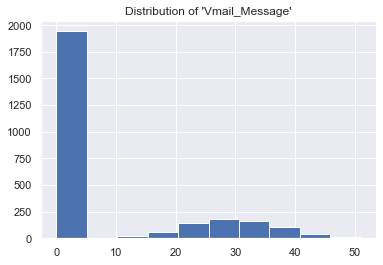

In [39]:
# Examining feature: 'Vmail_Message'

plt.hist(X_train_val['Vmail_Message'])

plt.title('Distribution of \'Vmail_Message\'')
plt.show()

**Insights**
- Since this feature has 0 as the most frequent value for most observations, I'll make this a candidate for a binary column (to be done in feature engineering)

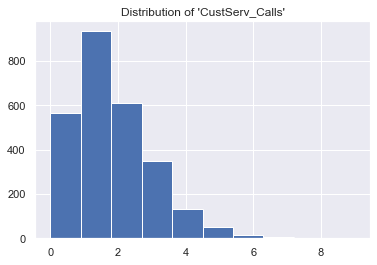

In [40]:
plt.hist(X_train_val['CustServ_Calls'])

plt.title('Distribution of \'CustServ_Calls\'')
plt.show()

### Encoding Target

In [41]:
# Instantiate Label Encoder for "Churn"

le = LabelEncoder()

In [42]:
y_train_val = le.fit_transform(y_train_val)

In [43]:
y_train_val

array([1, 0, 0, ..., 1, 1, 1])

### Train-Test Split

In [44]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=0.25)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1999, 20) (667, 20) (1999,) (667,)


---

<p><a name="sel"></a></p>

### Feature Selection

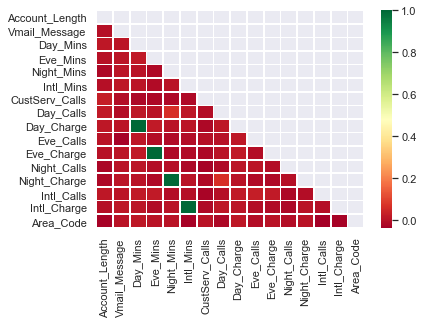

In [45]:
mask = np.zeros_like(X_train.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(X_train.corr(), mask= mask, linewidth=0.7, cmap='RdYlGn') 
plt.show()

**Insights:**
- Following features are highly correlated
    - Day_Mins & Day_Charge
    - Eve_Mins & Eve_Charge
    - Night_Mins & Night_Charge
    - Intl_Mins & Intl_Charge
- Either set are candidates for being dropped or their combination for feature engineering

---

<p><a name="engg"></a></p>

### Feature Engineering

In [46]:
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    
    '''
    Descr:
    This class contains methods to undertake categorical transformations
    on features and its output will be used as CustomTransfomers 
    in the pipeline functionality to prevent data leakage and also
    automate categorical transformations on unseen data.
    
    Tasks performed by transform() method:
    1. Drops columns not required / provide no predictive information the model

    I/P:
    Features dataframe

    O/P:
    numpy array of transformed numerical features
    '''    
    
    # Class constructor
    def __init__(self):
        pass
    
    # fit method - does nothing and returns self
    def fit(self, X, y=None):
        return self
    
    # Binarize method
    def binarize(self, obj):
        if obj == 0:
            return 0
        else:
            return 1
    
    # transform method for custom transformations
    def transform(self, X, y=None):
        
        # Doing this to avoid Chained Indexing error:
        # "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame"
        X1 = X.copy()
        
        # Dropping columns that:
            # were transformed above
            # provide no predictive information
        X1.drop(['Phone'], axis=1, inplace=True)

        
        
        # Return numpy array of transformed numerical features
        return X1 

In [47]:
class NumericalTransformer(BaseEstimator, TransformerMixin):
    
    '''
    Descr:
    This class contains methods to undertake numerical transformations
    on features and its output will be used as CustomTransfomers 
    in the pipeline functionality to prevent data leakage and also
    automate numerical transformations on unseen data.
    For it to qualify as a transformer, it will contain the .fit()
    and .transform() methods and we'll be inheriting from 2 classes
    that faciliate this class being a transformer.
    
    Tasks performed by transform() method:
    1. Creates 4 (Day, Eve, Night, Intl) "ChargesPerMin" columns and drops original
    2. Create binary column of features that are highly skewed to 1 value
    3. Drops columns not required / provide no predictive information the model

    I/P:
    Features dataframe

    O/P:
    numpy array of transformed numerical features
    '''    
    
    # Class constructor
    def __init__(self):
        pass
    
    # fit method - does nothing and returns self
    def fit(self, X, y=None):
        return self
    
    # Binarize method
    def binarize(self, obj):
        if obj == 0:
            return 0
        else:
            return 1
    
    # transform method for custom transformations
    def transform(self, X, y=None):
        
        # Doing this to avoid Chained Indexing error:
        # "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame"
        X1 = X.copy()
        
        # Create 4 new columns for Charge/min for Day, Eve, Night, Intl
        X1.loc[:,'ChargePerMin_Day'] = (X['Day_Charge'] / X['Day_Mins'])
        X1.loc[:,'ChargePerMin_Eve'] = (X['Eve_Charge'] / X['Eve_Mins'])
        X1.loc[:,'ChargePerMin_Night'] = (X['Night_Charge'] / X['Night_Mins'])
        X1.loc[:,'ChargePerMin_Intl'] = (X['Intl_Charge'] / X['Intl_Mins'])
        
        # Binarize columns
        X1.loc[:,'Vmail_Message_b'] = X1['Vmail_Message'].apply(self.binarize)

        
        # Dropping columns that:
            # were transformed above
            # provide no predictive information
        X1.drop(['Day_Charge','Day_Mins','Eve_Charge','Eve_Mins',\
                 'Night_Charge','Night_Mins','Intl_Charge','Intl_Mins',\
                 'Vmail_Message','Area_Code'], axis=1, inplace=True)

        
        # Return numpy array of transformed numerical features
        return X1    #X1.values

In [48]:
# Instantiate Transformers: 

# Categorical 
cat_transformer = CategoricalTransformer()
imp_mode_c = SimpleImputer(strategy='most_frequent')
oe = OrdinalEncoder()
ohe = OneHotEncoder()

# Numerical
imp_median_n = SimpleImputer(strategy='median')
num_transformer = NumericalTransformer()
ss = StandardScaler()

In [49]:
# Tagging features for transformations

# Categorical 
features_for_cat_trans = features_cat
features_for_oe = ['Intl_Plan', 'Vmail_Plan']
features_for_ohe = ['State']
features_for_cat_imp = features_cat

# Numerical
features_for_num_trans = features_num
features_for_num_imp = features_num
features_for_ss = features_num

In [50]:
# Categorical pipelines
# Pipeline for imputation & ordinal encoding
pipe_cat = make_pipeline(cat_transformer, imp_mode_c, oe, ohe)

# # Pipeline for imputation & onehot encoding
# pipe_imp_ohe = make_pipeline(imp_mode_c, ohe)


# Numerical pipelines
# pipe_num = make_pipeline(imp_median_n, num_transformer,ss) # ADD checking uncomment #@@@@@@@@@@@@@@@@@@@@@@@
# pipe_num = make_pipeline(num_transformer) 

In [51]:
# Utilizing Column Transformer for transformations

# ct = make_column_transformer(
#     (oe, ['Intl_Plan', 'Vmail_Plan']),
#     (ohe, ['State']),
#     (ss, ['Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Calls']) # this should be for all numerical columns. Check.
#     ,remainder='passthrough')

In [52]:
# Utilizing Column Transformer for transformations

ct = make_column_transformer(
    (pipe_cat, features_cat)
#     (pipe_imp_oe, features_for_oe)
#     ,(pipe_imp_ohe, features_for_ohe)
#     ,(pipe_imp_numtr_ss, features_num)  # do without ss first to see output and then standardize if looks correct! 
    ,remainder='drop')  #@@@@@@@@@@@@@@@@@@@@@@@ change to pass through

In [53]:
ct.fit_transform(X_train).shape

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(1999, 55)